In [1]:
## Import Library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pprint import pprint 
import math 

%matplotlib inline 
pd.set_option('display.max_columns', 100)

In [2]:
# Load real estate data from CSV
df_raw = pd.read_csv('data/RealEstateData.csv')
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
len(df_raw)

511

# Preprocessing Data
Preprocessing data dapat dilakukan melalui tahap berikut.
1. Descriptive Analytic<br>
Tahap memahami data yang didalamnya akan terjadi penemuan missing data, duplicate data dan anomaly data.
2. Exploratory Analytic<br>
Pencarian fitur2 tambahan dan insight.

## **DESCRIPTIVE ANALYTIC**

Tahap pemahaman dan pembersihan data

1. Load Data
2. Pendefinisian Datatype
3. Data Cleaning

### 1. Load Data

In [4]:
df = df_raw
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# def clear_text(x):
#     return x.replace("\n","")

with open('data/RealEstateData-Description.txt','r') as info:
#     pprint(list(map(clear_text, info.readlines())))
    print("".join(info.readlines()))

Concerns housing values in suburbs of Boston.
Number of Instances: 506
Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:
1.CRIM per capita crime rate by town
2.ZN proportion of residential land zoned for lots over
3. 25,000 sq.ft.
4. INDUS proportion of non-retail business acres per town
5. CHAS Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
6. NOX nitric oxides concentration (parts per 10 million)
7. RM average number of rooms per dwelling
8. AGE proportion of owner-occupied units built prior to 1940
9. DIS weighted distances to five Boston employment centres
10. RAD index of accessibility to radial highways
11. TAX full-value property-tax rate per $10,000
12. PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks
by town
13. LSTAT % lower status of the population
14. MEDV Median value of owner-occupied homes in $1000's

Missing Attribute V

### 2. Pendefinisian Datatype
**Kolom dalam dataset harus didefinisikan kedalam 3 type : numerik, kategorical, boolean**<br>
Karena beberapa nama kolom dirahasiakan, maka ada kemungkinan adanya data yang berisi numerik, namun sebenarnya adalah kategorikal. <br>

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
## Check Hidden Category
check_category = {"nama":[],"min":[],"max":[],"selisih":[],"nunique":[]}

for i in df.columns:
    check_category["nama"].append(df[i].name)
    check_category["min"].append(df[i].min())
    check_category["max"].append(df[i].max())
    check_category["selisih"].append(df[i].max()-df[i].min())
    check_category["nunique"].append(df[i].nunique())

pd.DataFrame(check_category)

,nama,min,max,selisih,nunique
0,CRIM,0.00632,88.9762,88.96988,509
1,ZN,0.00000,100.0000,100.00000,26
2,INDUS,0.46000,27.7400,27.28000,79
3,CHAS,0.00000,1.0000,1.00000,2
4,NOX,0.38500,0.8710,0.48600,82
5,RM,3.56100,8.7800,5.21900,444
6,AGE,2.90000,100.0000,97.10000,357
7,DIS,1.12960,12.1265,10.99690,416
8,RAD,1.00000,24.0000,23.00000,9
9,TAX,187.00000,711.0000,524.00000,67


**Asumsi : kolom kategori memiliki ununique = (selisih+1)**
<br>`variable` memiliki ununique = (selisih+1), dianggap sebagai kategorikal
<br>`variable` memiliki nunique = 2, dianggap sebagai boolean
<br>`variable` memiliki selisih > nuniquenya, tidak dianggap sebagai kategorikal
<br>
<br>Maka kolom-kolom yang dianggap kategorikal adalah.
1. `CHAS`

<br>sisanya adalah kolom numerik

In [49]:
## Ubah kolom CHAS menjadi string kategori

df.CHAS = df.CHAS.apply(lambda x: 'bounds river' if x==1 else 'not bound river')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,not bound river,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,not bound river,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,not bound river,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,not bound river,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,not bound river,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Data Cleaning
**Data cleaning dalam hal ini terdiri dari 3 hal, yaitu:**
1. penghapusan data duplikat
2. pembersihan data anomaly 
3. pengisian data null 

#### 1. Penghapusan Data Duplikat

In [54]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(511, 14)
(511, 14)


#### 2. Pembersihan Data Anomaly

In [55]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [98]:
df["CHAS"].describe()

count                 511
unique                  1
top       not bound river
freq                  511
Name: CHAS, dtype: object

#### 3. Pengisian Data Missing

In [56]:
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,not bound river,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,not bound river,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,not bound river,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,not bound river,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,not bound river,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


Terdapat 5 data dengan nilai RM (average number of rooms per dwelling) yang **null**<br>


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    object 
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 59.9+ KB


## **EXPLORATORY ANALYTIC**

Tahap penemuan pattern, fitur, dan insight

In [93]:
list_kategorikal = ["CHAS"]
list_kuantitatif = list(df.columns)
for i in list_kategorikal:
    list_kuantitatif.remove(i)

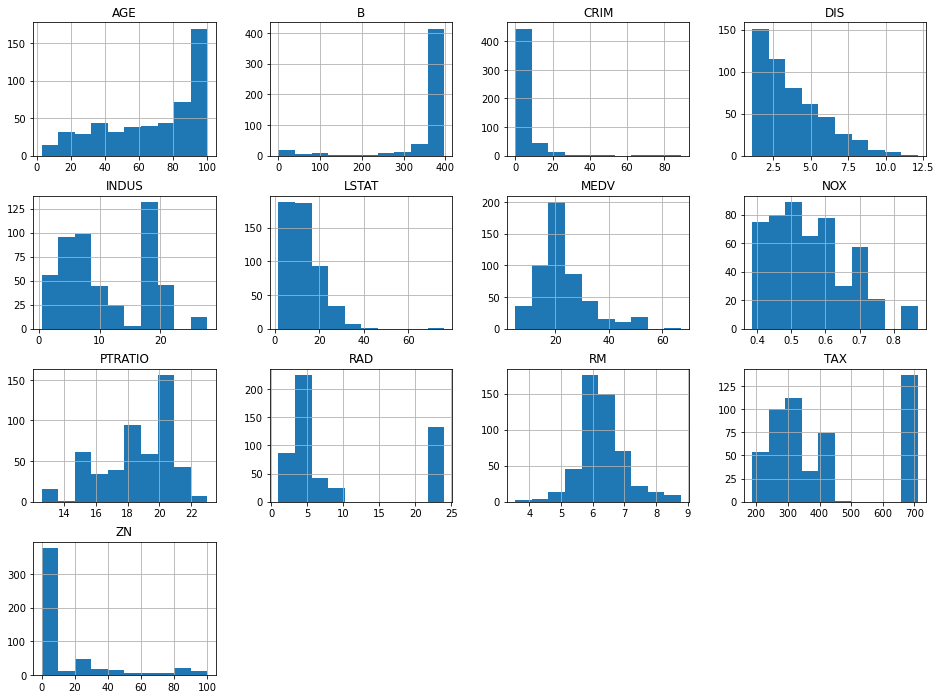

In [138]:
## Tendensi data per kolom
a = df.hist(figsize=[16,12])

#### 1. Perbandingan data kategorikal dan kuantitatif

In [ ]:
## Tendensi data per kolom

for label in list_kategorikal:
    print("######################################################################################")
    print("#######  ",label,"  ##################################################################")
    print("######################################################################################")
    
    n_col = 3
    n_fig = np.ceil(len(list_kuantitatif)/n_col).astype(int)
    f, axes = plt.subplots(n_fig, n_col, figsize=(16, n_fig*6), sharex=False)
    sns.despine(left=True)
    
    for i,kolom in enumerate(list_kuantitatif):
        ax_x = np.floor(i/n_col).astype(int)
        ax_y = i%n_col
        
        sns.violinplot(x=kolom, y=label , data=df, ax=axes[ax_x,ax_y])
        
    plt.show()

#### 2. Perbandingan data kuantitatif dan kuantitatif

In [147]:
import itertools


In [ ]:
list_combination = list(itertools.combinations(list_kuantitatif,2))

for label in list_kuantitatif:
    print("######################################################################################")
    print("#######  ",label,"  ##################################################################")
    print("######################################################################################")
    
    n_col = 3
    n_fig = np.ceil(len(list_combination)/n_col).astype(int)
    f, axes = plt.subplots(n_fig, n_col, figsize=(16, n_fig*6), sharex=False)
    sns.despine(left=True)
    
    for i,kolom in enumerate(list_combination):

        ax_x = np.floor(i/n_col).astype(int)
        ax_y = i%n_col
        sns.scatterplot(y=kolom[0], x=kolom[1],  data=df, ax=axes[ax_x,ax_y])
        
        ax = axes[ax_x,ax_y]
        ax.set_title("{} vs {}".format(kolom[0],kolom[1]))
        
    plt.show()


#### 3. Perbandingan data kuantitatif dan kuantitatif dengan rentang harga
rentang harga disusun berdasarkan bin dengan rumus

Attribute Information:
1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per `$10,000`
11. PTRATIO pupil-teacher ratio by town 
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT % lower status of the population
14. MEDV Median value of owner-occupied homes in $1000's


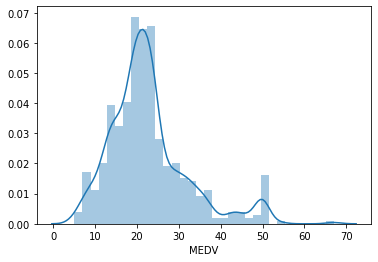

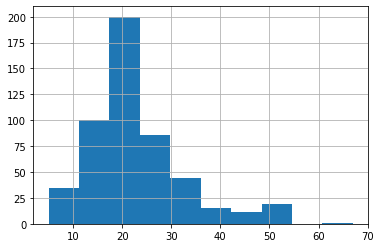

In [155]:
### Rentang harga 
sns.distplot(df.MEDV, hist=True, norm_hist=True, kde=True)
plt.show()
df.MEDV.hist()
plt.show()

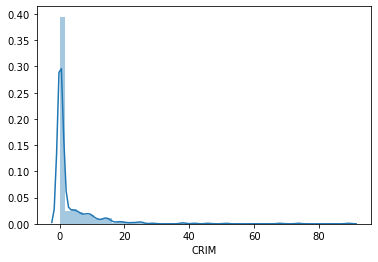

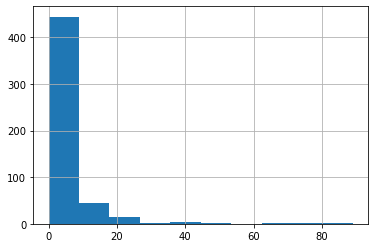

In [152]:
### Rentang kriminalitas 
sns.distplot(df.CRIM, hist=True, norm_hist=True)
plt.show()
df.CRIM.hist()
plt.show()

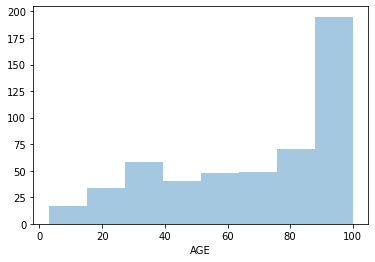

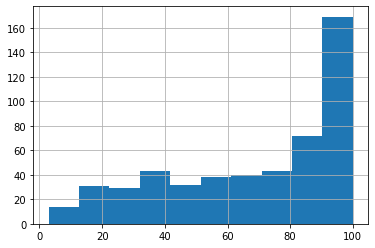

In [127]:
### Rentang umur 
sns.distplot(df.AGE, hist=True, norm_hist=False, kde=False)
plt.show()
df.AGE.hist()
plt.show()

In [173]:
df2 = df.copy()

def rule1(x):
    if(x <= 15 ):
        return "Cheap"
    elif (x <= 30 ):
        return "Medium"
    elif (x <= 50 ):
        return "High"
    else:
        return "Very High"
    
def rule2(x):
    if(x <=10 ):
        return "Low"
    elif (x <=50 ):
        return "Medium"
    else:
        return "High"
    
def rule3(x):
    if(x <= 20):
        return "New"
    elif (x <= 40):
        return "Medium"
    elif (x <= 80 ):
        return "Old"
    else:
        return "Very Old"

df2["MEDV_GROUP"] = df2.MEDV.apply(lambda x: rule1(x))
df2["CRIM_GROUP"] = df2.CRIM.apply(lambda x: rule2(x))
df2["AGE_GROUP"] = df2.AGE.apply(lambda x: rule3(x))

In [174]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_GROUP,CRIM_GROUP,AGE_GROUP
0,0.00632,18.0,2.31,not bound river,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Medium,Low,Old
1,0.02731,0.0,7.07,not bound river,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Medium,Low,Old
2,0.02729,0.0,7.07,not bound river,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,High,Low,Old
3,0.03237,0.0,2.18,not bound river,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,High,Low,Old
4,0.06905,0.0,2.18,not bound river,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,High,Low,Old


In [ ]:
list_kategorikal = ["CHAS","MEDV_GROUP","CRIM_GROUP","AGE_GROUP"]
list_kuantitatif = list(df.columns)
for i in list_kategorikal:
    list_kuantitatif.remove(i)


In [ ]:
## Tendensi data per kolom

for label in [ x for x in list_kategorikal if x not in ['CHAS'] ]:
    print("######################################################################################")
    print("#######  ",label,"  ##################################################################")
    print("######################################################################################")
    
    n_col = 3
    n_fig = np.ceil(len(list_kuantitatif)/n_col).astype(int)
    f, axes = plt.subplots(n_fig, n_col, figsize=(16, n_fig*6), sharex=False)
    sns.despine(left=True)
    
    for i,kolom in enumerate(list_kuantitatif):
        ax_x = np.floor(i/n_col).astype(int)
        ax_y = i%n_col
        
        sns.violinplot(x=kolom, y=label , data=df2, ax=axes[ax_x,ax_y])
        
    plt.show()

In [ ]:
list_combination = list(itertools.combinations(list_kuantitatif,2))

for label in [ x for x in list_kuantitatif if x not in ['MEDV'] ]:
    print("######################################################################################")
    print("#######  ",label,"  ##################################################################")
    print("######################################################################################")
    
    n_col = 3
    n_fig = np.ceil(len(list_combination)/n_col).astype(int)
    f, axes = plt.subplots(n_fig, n_col, figsize=(16, n_fig*6), sharex=False)
    sns.despine(left=True)
    
    for i,kolom in enumerate([ x for x in list_combination if x not in ['MEDV'] ]):

        ax_x = np.floor(i/n_col).astype(int)
        ax_y = i%n_col
        sns.scatterplot(y=kolom[0], x=kolom[1], hue="MEDV_GROUP", data=df2, ax=axes[ax_x,ax_y])
        
        ax = axes[ax_x,ax_y]
        ax.set_title("{} vs {}".format(kolom[0],kolom[1]))
        
    plt.show()


In [ ]:
# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per $10,000
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT % lower status of the population
# MEDV Median value of owner-occupied homes in $1000's


list_combination = list(itertools.combinations(list_kuantitatif,2))

for label in [ x for x in list_kuantitatif if x not in ['CRIM'] ]:
    print("######################################################################################")
    print("#######  ",label,"  ##################################################################")
    print("######################################################################################")
    
    n_col = 3
    n_fig = np.ceil(len(list_combination)/n_col).astype(int)
    f, axes = plt.subplots(n_fig, n_col, figsize=(16, n_fig*6), sharex=False)
    sns.despine(left=True)
    
    for i,kolom in enumerate([ x for x in list_combination if x not in ['CRIM'] ]):

        ax_x = np.floor(i/n_col).astype(int)
        ax_y = i%n_col
        sns.scatterplot(y=kolom[0], x=kolom[1], hue="CRIM_GROUP", data=df2, ax=axes[ax_x,ax_y])
        
        ax = axes[ax_x,ax_y]
        ax.set_title("{} vs {}".format(kolom[0],kolom[1]))
        
    plt.show()


In [ ]:
list_combination = list(itertools.combinations(list_kuantitatif,2))

for label in [ x for x in list_kuantitatif if x not in ['AGE'] ]:
    print("######################################################################################")
    print("#######  ",label,"  ##################################################################")
    print("######################################################################################")
    
    n_col = 3
    n_fig = np.ceil(len(list_combination)/n_col).astype(int)
    f, axes = plt.subplots(n_fig, n_col, figsize=(16, n_fig*6), sharex=False)
    sns.despine(left=True)
    
    for i,kolom in enumerate([ x for x in list_combination if x not in ['AGE'] ]):

        ax_x = np.floor(i/n_col).astype(int)
        ax_y = i%n_col
        sns.scatterplot(y=kolom[0], x=kolom[1], hue="AGE_GROUP", data=df2, ax=axes[ax_x,ax_y])
        
        ax = axes[ax_x,ax_y]
        ax.set_title("{} vs {}".format(kolom[0],kolom[1]))
        
    plt.show()


In [235]:
dummy = pd.DataFrame({
"Department" : ["Finance","Finance","Finance","Information Technology","Information Technology","Information Technology","Production","Production","Production","Purchase","Purchase","Purchase"]
,"Risk Value" : [0.11,0.45,0.89,0.8,0.9,0.37,0.22,0.4,0.6,0.25,0.7,0.8]
,"Financial Value" : [220,300,850,195,350,700,90,400,210,240,700,65]
,"Financial Level" : ["High","High","Medium","Medium","High","Low","High","Medium","Low","High","High","Low"]
,"Cost" : [125,150,150,150,150,170,150,180,190,190,180,100]
,"Project Name" : ["Profit and Loss","Inward Clearing","Balance Sheet","Public facing Web","Asset Management","Intranet Web","Quality Control","Maintenance Schedules","Shift Management","Vendor Management","Invoice Management","Inventory Management"]
})

In [233]:
dummy

,Department,Risk Value,Financial Value,Cost,Project Name
0,Finance,0.11,220,125,Profit and Loss
1,Finance,0.45,300,150,Inward Clearing
2,Finance,0.89,850,150,Balance Sheet
3,Information Technology,0.80,195,150,Public facing Web
4,Information Technology,0.90,350,150,Asset Management
5,Information Technology,0.37,700,170,Intranet Web
6,Production,0.22,90,150,Quality Control
7,Production,0.40,400,180,Maintenance Schedules
8,Production,0.60,210,190,Shift Management
9,Purchase,0.25,240,190,Vendor Management


In [32]:

grp = ["Very Good","Good","Ok","Bad","Very Bad"]

grp_color = {
    "Very Good":'#3bc264',
    "Good":'#49d8b2',
    "Ok":'#c18ef8',
    "Bad":'#fbba88',
    "Very Bad":'#f08573'
}

level_limit = {
    "CRIM":{ # 0.006320 - 88.976200  | crime rate
        "1":{"val_min":None,"val_max":10,"label":"Very Good"},
        "2":{"val_min":10,"val_max":35,"label":"Good"},
        "3":{"val_min":36,"val_max":50,"label":"Ok"},
        "4":{"val_min":51,"val_max":80,"label":"Bad"},
        "5":{"val_min":81,"val_max":None,"label":"Very Bad"}
    },
    "ZN":{ # 0.46 - 100  | proportion of residential land zoned
        "1":{"val_min":None,"val_max":10,"label":"Very Bad"},
        "2":{"val_min":10,"val_max":35,"label":"Bad"},
        "3":{"val_min":36,"val_max":50,"label":"Ok"},
        "4":{"val_min":51,"val_max":80,"label":"Good"},
        "5":{"val_min":81,"val_max":None,"label":"Very Good"}
    },
    "INDUS":{ # 3.561 - 27.74  | proportion of non-retail business
        "1":{"val_min":None,"val_max":5,"label":"Very Bad"},
        "2":{"val_min":6,"val_max":10,"label":"Bad"},
        "3":{"val_min":11,"val_max":20,"label":"Ok"},
        "4":{"val_min":21,"val_max":24,"label":"Good"},
        "5":{"val_min":25,"val_max":None,"label":"Very Good"}
    },
    "CHAS":{ # bound river - not bound river | Charles River Bound
        "1":{"val_min":None,"val_max":10,"label":"Ok"},
        "2":{"val_min":10,"val_max":35,"label":"Ok"},
        "3":{"val_min":36,"val_max":50,"label":"Ok"},
        "4":{"val_min":51,"val_max":80,"label":"Ok"},
        "5":{"val_min":81,"val_max":None,"label":"Ok"}
    },
    "NOX":{ # 0.385 - 0.871 | N02 concentration
        "1":{"val_min":None,"val_max":0.4,"label":"Very Bad"},
        "2":{"val_min":0.4,"val_max":0.5,"label":"Bad"},
        "3":{"val_min":0.5,"val_max":0.7,"label":"Ok"},
        "4":{"val_min":0.7,"val_max":0.8,"label":"Good"},
        "5":{"val_min":0.8,"val_max":None,"label":"Very Good"}
    },
    "RM":{ # 3.561 - 8.78 | number of rooms
        "1":{"val_min":None,"val_max":4,"label":"Ok"},
        "2":{"val_min":4,"val_max":5,"label":"Ok"},
        "3":{"val_min":5,"val_max":7,"label":"Ok"},
        "4":{"val_min":7,"val_max":8,"label":"Ok"},
        "5":{"val_min":8,"val_max":None,"label":"Ok"}
    },
    "AGE":{ # 2.9 - 100  | units age 
        "1":{"val_min":None,"val_max":10,"label":"Ok"},
        "2":{"val_min":10,"val_max":35,"label":"Ok"},
        "3":{"val_min":36,"val_max":50,"label":"Ok"},
        "4":{"val_min":51,"val_max":80,"label":"Ok"},
        "5":{"val_min":81,"val_max":None,"label":"Ok"}
    },
    "DIS":{ # 1.1296 - 12.1265  | distances to employment centres
        "1":{"val_min":None,"val_max":3,"label":"Very Bad"},
        "2":{"val_min":3,"val_max":5,"label":"Bad"},
        "3":{"val_min":6,"val_max":8,"label":"Ok"},
        "4":{"val_min":9,"val_max":10,"label":"Good"},
        "5":{"val_min":11,"val_max":None,"label":"Very Good"}
    },
    "RAD":{ # 1 - 24  | accessibility to radial highways
        "1":{"val_min":None,"val_max":4,"label":"Very Bad"},
        "2":{"val_min":4,"val_max":8,"label":"Bad"},
        "3":{"val_min":8,"val_max":14,"label":"Ok"},
        "4":{"val_min":14,"val_max":20,"label":"Good"},
        "5":{"val_min":20,"val_max":None,"label":"Very Good"}
    },
    "TAX":{ # 187 - 711  | property-tax rate
        "1":{"val_min":None,"val_max":200,"label":"Very Good"},
        "2":{"val_min":200,"val_max":350,"label":"Good"},
        "3":{"val_min":350,"val_max":500,"label":"Ok"},
        "4":{"val_min":500,"val_max":650,"label":"Bad"},
        "5":{"val_min":650,"val_max":None,"label":"Very Bad"}
    },
    "PTRATIO":{ # 12.6 - 23  | pupil-teacher ratio
        "1":{"val_min":None,"val_max":14,"label":"Very Bad"},
        "2":{"val_min":14,"val_max":16,"label":"Bad"},
        "3":{"val_min":16,"val_max":19,"label":"Ok"},
        "4":{"val_min":19,"val_max":21,"label":"Good"},
        "5":{"val_min":21,"val_max":None,"label":"Very Good"}
    },
    "B":{ # 0.32 - 396.9  | proportion of blacks
        "1":{"val_min":None,"val_max":10,"label":"Ok"},
        "2":{"val_min":10,"val_max":35,"label":"Ok"},
        "3":{"val_min":35,"val_max":50,"label":"Ok"},
        "4":{"val_min":50,"val_max":80,"label":"Ok"},
        "5":{"val_min":80,"val_max":None,"label":"Ok"}
    },
    "LSTAT":{ # 1.73 - 76  | lower status of the population
        "1":{"val_min":None,"val_max":10,"label":"Ok"},
        "2":{"val_min":10,"val_max":35,"label":"Ok"},
        "3":{"val_min":35,"val_max":50,"label":"Ok"},
        "4":{"val_min":50,"val_max":70,"label":"Ok"},
        "5":{"val_min":70,"val_max":None,"label":"Ok"}
    },
#     "MEDV":{ # 5 - 67  | house values $
#         "1":{"val_min":None,"val_max":10,"label":"below 10k"},
#         "2":{"val_min":10,"val_max":20,"label":"10k - 20k"},
#         "3":{"val_min":20,"val_max":30,"label":"20k - 30k"},
#         "4":{"val_min":30,"val_max":40,"label":"30k - 40k"},
#         "5":{"val_min":40,"val_max":50,"label":"40k - 50k"},
#         "6":{"val_min":50,"val_max":60,"label":"50k - 60k"},
#         "7":{"val_min":60,"val_max":None,"label":"above 60k"}
#     }
}

def get_level(var,x):

    if var == "MEDV":
        return math.floor(x)
    
    for key in level_limit[var]:
        ok = True
        rule = level_limit[var][key]
        
        if rule["val_min"] != None:
            if x >= rule["val_min"]:
                ok = ok&True
            else:
                ok = ok&False
        if rule["val_max"] != None:
            if x <= rule["val_max"]:
                ok = ok&True
            else:
                ok = ok&False

        if ok:
            return rule["label"]
    return None


def get_color(x):
    if x in grp_color:
        return grp_color[x]
    return grp_color["Ok"]

In [40]:
# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per $10,000
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT % lower status of the population
# MEDV Median value of owner-occupied homes in $1000's
df_grp = df_raw.copy()
df_grp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
keys = [c for c in df_raw if c not in ('MEDV')]
df_grp = pd.melt(df_raw, id_vars='MEDV', value_vars=keys, value_name='value')
df_grp["label"] = df_grp.apply(lambda x: get_level(x.variable,x.value) , axis = 1)
df_grp["color"] = df_grp.apply(lambda x: get_color(x.label) , axis = 1)
df_grp["price_segment"] = df_grp.apply(lambda x: get_level("MEDV",x.MEDV) , axis = 1)
df_grp.head(30)

,MEDV,variable,value,label,color,price_segment
0,24.0,CRIM,0.00632,Very Good,#3bc264,24
1,21.6,CRIM,0.02731,Very Good,#3bc264,21
2,34.7,CRIM,0.02729,Very Good,#3bc264,34
3,33.4,CRIM,0.03237,Very Good,#3bc264,33
4,36.2,CRIM,0.06905,Very Good,#3bc264,36
5,28.7,CRIM,0.02985,Very Good,#3bc264,28
6,22.9,CRIM,0.08829,Very Good,#3bc264,22
7,27.1,CRIM,0.14455,Very Good,#3bc264,27
8,16.5,CRIM,0.21124,Very Good,#3bc264,16
9,18.9,CRIM,0.17004,Very Good,#3bc264,18


In [42]:
df_1 = df_grp.groupby(['variable','price_segment'])['value'].agg(
    median= 'median', 
    avg= 'mean', 
    count= 'count', 
    max= 'max', 
    min= 'min'
)

df_2 = df_grp.groupby(['variable','price_segment','label'])['value'].agg(count= 'count')
df_2 = df_2.unstack(level=2, fill_value=0)
df_2.columns = [' '.join(col) for col in df_2.columns]
df_2


df_grp = df_1.join(df_2).reset_index()
df_grp = df_grp.fillna(0)
df_grp.tail(20)

,variable,price_segment,median,avg,count,max,min,count Bad,count Good,count Ok,count Very Bad,count Very Good
565,ZN,30,45.00,47.142857,7,90.0,0.0,2,2,1,1,1
566,ZN,31,10.00,29.375000,8,100.0,0.0,1,2,0,4,1
567,ZN,32,40.00,43.125000,8,95.0,0.0,1,0,3,2,2
568,ZN,33,33.00,29.388889,9,80.0,0.0,4,1,2,2,0
569,ZN,34,75.00,59.000000,5,95.0,0.0,0,2,1,1,1
570,ZN,35,20.00,37.500000,4,90.0,20.0,3,0,0,0,1
571,ZN,36,20.00,19.666667,6,45.0,0.0,3,0,1,2,0
572,ZN,37,0.00,25.000000,5,80.0,0.0,0,1,1,3,0
573,ZN,38,0.00,0.000000,1,0.0,0.0,0,0,0,1,0
574,ZN,39,0.00,0.000000,1,0.0,0.0,0,0,0,1,0


In [43]:
df_grp["value_percent"] = ((df_grp["avg"]-df_grp["min"])/(df_grp["max"]-df_grp["min"])*100).round()/100
df_grp["value_percent"] = df_grp["value_percent"].fillna(0)
df_grp["count_vg_percent"] = (df_grp["count Very Good"]/(df_grp["count"]))
df_grp["count_g_percent"] = (df_grp["count Good"]/(df_grp["count"]))
df_grp["count_ok_percent"] = (df_grp["count Ok"]/(df_grp["count"]))
df_grp["count_b_percent"] = (df_grp["count Bad"]/(df_grp["count"]))
df_grp["count_vb_percent"] = (df_grp["count Very Bad"]/(df_grp["count"]))

df_grp["value"] = df_grp["avg"]

df_grp["label"] = df_grp.apply(lambda x: get_level(x.variable,x.value) , axis = 1)
df_grp["color"] = df_grp.apply(lambda x: get_color(x.label) , axis = 1)
df_grp[df_grp.variable=="DIS"]

,variable,price_segment,median,avg,count,max,min,count Bad,count Good,count Ok,count Very Bad,count Very Good,value_percent,count_vg_percent,count_g_percent,count_ok_percent,count_b_percent,count_vb_percent,value,label,color
180,DIS,5,1.48960,1.501267,3,1.5888,1.4254,0,0,0,3,0,0.46,0.000000,0.000000,0.000000,0.000000,1.000000,1.501267,Very Bad,#f08573
181,DIS,6,1.50040,1.500400,1,1.5004,1.5004,0,0,0,1,0,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.500400,Very Bad,#f08573
182,DIS,7,1.65820,1.655200,7,1.8347,1.4261,0,0,0,7,0,0.56,0.000000,0.000000,0.000000,0.000000,1.000000,1.655200,Very Bad,#f08573
183,DIS,8,1.79830,1.744670,10,1.9142,1.4395,0,0,0,10,0,0.64,0.000000,0.000000,0.000000,0.000000,1.000000,1.744670,Very Bad,#f08573
184,DIS,9,1.96820,1.913600,3,2.0026,1.7700,0,0,0,3,0,0.62,0.000000,0.000000,0.000000,0.000000,1.000000,1.913600,Very Bad,#f08573
185,DIS,10,1.61850,1.664830,10,1.9976,1.3861,0,0,0,10,0,0.46,0.000000,0.000000,0.000000,0.000000,1.000000,1.664830,Very Bad,#f08573
186,DIS,11,1.93560,1.838522,9,2.5050,1.1781,0,0,0,9,0,0.50,0.000000,0.000000,0.000000,0.000000,1.000000,1.838522,Very Bad,#f08573
187,DIS,12,1.95760,2.165850,10,4.2330,1.5331,1,0,0,9,0,0.23,0.000000,0.000000,0.000000,0.100000,0.900000,2.165850,Very Bad,#f08573
188,DIS,13,1.94495,2.241271,24,4.4546,1.1370,5,0,0,19,0,0.33,0.000000,0.000000,0.000000,0.208333,0.791667,2.241271,Very Bad,#f08573
189,DIS,14,2.21605,2.646444,18,5.8700,1.4394,3,0,0,14,0,0.27,0.000000,0.000000,0.000000,0.166667,0.777778,2.646444,Very Bad,#f08573


In [44]:
df_grp[df_grp.value_percent==np.Inf]


,variable,price_segment,median,avg,count,max,min,count Bad,count Good,count Ok,count Very Bad,count Very Good,value_percent,count_vg_percent,count_g_percent,count_ok_percent,count_b_percent,count_vb_percent,value,label,color


In [45]:
df_grp = df_grp.replace([np.inf, -np.inf], 0)
df_grp["price_segment_int"] = df_grp["price_segment"]
df_grp["price_segment"] = df_grp["price_segment"].apply(lambda x: "{}k".format(x))
df_grp.head()

,variable,price_segment,median,avg,count,max,min,count Bad,count Good,count Ok,count Very Bad,count Very Good,value_percent,count_vg_percent,count_g_percent,count_ok_percent,count_b_percent,count_vb_percent,value,label,color,price_segment_int
0,AGE,5k,100.0,100.000000,3,100.0,100.0,0,0,3,0,0,0.00,0.0,0.0,1.0,0.0,0.0,100.000000,Ok,#c18ef8,5
1,AGE,6k,77.8,77.800000,1,77.8,77.8,0,0,1,0,0,0.00,0.0,0.0,1.0,0.0,0.0,77.800000,Ok,#c18ef8,6
2,AGE,7k,98.3,96.671429,7,100.0,89.5,0,0,7,0,0,0.68,0.0,0.0,1.0,0.0,0.0,96.671429,Ok,#c18ef8,7
3,AGE,8k,95.7,92.930000,10,100.0,76.5,0,0,10,0,0,0.70,0.0,0.0,1.0,0.0,0.0,92.930000,Ok,#c18ef8,8
4,AGE,9k,95.6,95.300000,3,97.0,93.3,0,0,3,0,0,0.54,0.0,0.0,1.0,0.0,0.0,95.300000,Ok,#c18ef8,9


In [46]:
import plotly.graph_objects as go
import plotly.express as px
import math

# Load data, define hover text and bubble size
data = df_grp
data = data.sort_values(by=['price_segment_int'])

hover_text = []
bubble_size = []

for index, row in data.iterrows():
    hover_text.append(('{}: Description<br>{}  <br>').format(
            row['variable'],
            row['value']
        )
    )
    bubble_size.append((row['value_percent'])*550 + 150)

data['text'] = hover_text
data['size'] = bubble_size
sizeref = 2.*max(data['size'])/(40**2)

# Dictionary with dataframes for each label
label_data = {label:data.query("label == '%s'" %label) for label in grp }
          
        
# Create figure
fig = go.Figure()

for label_name, label in label_data.items():
    fig.add_trace(go.Scatter(
            x=label['variable'], 
            y=label['price_segment'],
            name=label_name, text=label['text'],
            marker_size=label['size'],
            marker_color=label['color']
        ))

# # Tune marker appearance and layout
fig.update_traces(
    mode='markers', 
    marker=dict(
        sizemode='area',
        sizeref=sizeref, 
        line_width=2,
    )
)

fig.update_layout(
    title='House Pricing Segment Comparison',
    yaxis=dict(
        title='Environment',
        gridcolor='white',
        gridwidth=2,
    ),
    xaxis=dict(
        title='Price Segment (in $1000)',
        gridcolor='white',
        gridwidth=2,
    ),
    height=1800,
    paper_bgcolor='rgb(229, 236, 246)',
    plot_bgcolor='rgb(229, 236, 246)',
)
fig.show()

In [26]:
data.head()

,variable,price_segment,median,avg,count,max,min,count Bad,count Good,count Ok,count Very Bad,count Very Good,value_percent,count_vg_percent,count_g_percent,count_ok_percent,count_b_percent,count_vb_percent,value,label,color,text,size
0,AGE,10k,94.50,90.750000,10,100.0,59.7,0,0,10,0,0,0.77,0.0,0.0,1.000000,0.0,0.0,90.750000,Ok,#c18ef8,AGE: Description<br>90.75000000000001 <br>,573.5
1,AGE,11k,95.00,90.666667,9,100.0,70.6,0,0,8,0,0,0.68,0.0,0.0,0.888889,0.0,0.0,90.666667,Ok,#c18ef8,AGE: Description<br>90.66666666666667 <br>,524.0
2,AGE,12k,95.35,94.950000,10,100.0,87.9,0,0,10,0,0,0.58,0.0,0.0,1.000000,0.0,0.0,94.950000,Ok,#c18ef8,AGE: Description<br>94.95 <br>,469.0
3,AGE,13k,96.55,94.670833,24,100.0,80.3,0,0,23,0,0,0.73,0.0,0.0,0.958333,0.0,0.0,94.670833,Ok,#c18ef8,AGE: Description<br>94.67083333333333 <br>,551.5
4,AGE,14k,95.00,93.766667,18,100.0,83.7,0,0,18,0,0,0.62,0.0,0.0,1.000000,0.0,0.0,93.766667,Ok,#c18ef8,AGE: Description<br>93.76666666666668 <br>,491.0


In [655]:
import plotly.express as px
fig = px.scatter(data, x="price_segment", y="variable", color="label",
                 size=(data['value_percent'])*350 + 150, hover_data=['value'])
fig.show()

In [654]:
data.head()

,variable,price_segment,median,avg,count,max,min,count Bad,count Good,count Ok,count Very Bad,count Very Good,value_percent,count_vg_percent,count_g_percent,count_ok_percent,count_b_percent,count_vb_percent,value,label,color,text,size
0,AGE,10k - 20k,93.35,84.917708,192,100.0,18.5,0,0,190,0,0,0.81,0.0,0.0,0.989583,0.0,0.0,84.917708,Ok,#c18ef8,AGE: Description<br>84.91770833333332 <br>,433.5
1,AGE,20k - 30k,56.05,55.447115,208,100.0,2.9,0,0,206,0,0,0.54,0.0,0.0,0.990385,0.0,0.0,55.447115,Ok,#c18ef8,AGE: Description<br>55.447115384615394 <br>,339.0
2,AGE,30k - 40k,44.30,51.283333,54,100.0,9.9,0,0,53,0,0,0.46,0.0,0.0,0.981481,0.0,0.0,51.283333,Ok,#c18ef8,AGE: Description<br>51.28333333333333 <br>,311.0
3,AGE,40k - 50k,73.30,66.280645,31,100.0,8.4,0,0,31,0,0,0.63,0.0,0.0,1.000000,0.0,0.0,66.280645,Ok,#c18ef8,AGE: Description<br>66.28064516129034 <br>,370.5
4,AGE,50k - 60k,98.00,98.000000,1,98.0,98.0,0,0,1,0,0,0.00,0.0,0.0,1.000000,0.0,0.0,98.000000,Ok,#c18ef8,AGE: Description<br>98.0 <br>,150.0


In [674]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [680]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_matrix = df_raw
df_matrix["price_segment"] = df_matrix.apply(lambda x: get_level("MEDV",x.MEDV) , axis = 1)

fig = ff.create_scatterplotmatrix(df_matrix[['RM','TAX','CRIM','price_segment']], diag='box', index='price_segment',
                                  height=800, width=800)
py.iplot(fig, filename='Box plots along Diagonal Subplots')

PlotlyRequestError: Authentication credentials were not provided.

In [681]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df)
fig.show()

In [ ]:
%a: Returns the first three characters of the weekday, e.g. Wed.
%A: Returns the full name of the weekday, e.g. Wednesday.
%B: Returns the full name of the month, e.g. September.
%w: Returns the weekday as a number, from 0 to 6, with Sunday being 0.
%m: Returns the month as a number, from 01 to 12.
%p: Returns AM/PM for time.
%y: Returns the year in two-digit format, that is, without the century. For example, "18" instead of "2018".
%f: Returns microsecond from 000000 to 999999.
%Z: Returns the timezone.
%z: Returns UTC offset.
%j: Returns the number of the day in the year, from 001 to 366.
%W: Returns the week number of the year, from 00 to 53, with Monday being counted as the first day of the week.
%U: Returns the week number of the year, from 00 to 53, with Sunday counted as the first day of each week.
%c: Returns the local date and time version.
%x: Returns the local version of date.
%X: Returns the local version of time.

%b: Returns the first three characters of the month name. In our example, it returned "Sep"
%d: Returns day of the month, from 1 to 31. In our example, it returned "15".
%Y: Returns the year in four-digit format. In our example, it returned "2018".
%H: Returns the hour. In our example, it returned "00".
%M: Returns the minute, from 00 to 59. In our example, it returned "00".
%S: Returns the second, from 00 to 59. In our example, it returned "00".

In [1]:
from datetime import datetime

In [7]:
datetime.strptime("Wed Mar  3 18:24:48 WIB 2021","%a %b  %d %H:%M:%S WIB %Y").strftime("%Y-%m-%d %H:%M:%S")


'2021-03-03 18:24:48'